## Time Series Analysis for The Role of Statistics in Modern Technology

Cleaned Dataset (1991-2023) for Statistics_In_Modern_Technology:
Year
1991     8
1992    10
1993     9
1994    11
1995    14
1996    12
1997    12
1998    18
1999    21
2000    34
2001    39
2002    56
2003    49
2004    72
2005    81
2006    74
2007    85
2008   103
2009   115
2010   140
2011   129
2012   169
2013   215
2014   238
2015   251
2016   277
2017   248
2018   278
2019   340
2020   449
2021   414
2022   355
2023   369
Name: Statistics_In_Modern_Technology, dtype: float64

Dataset shape: (33, 2)


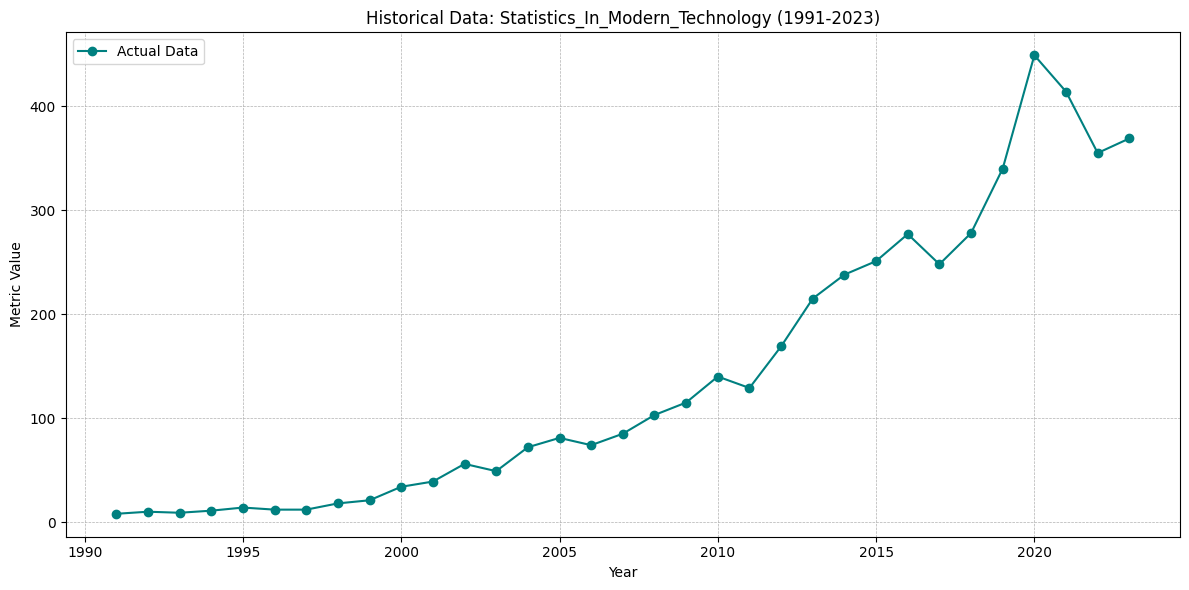

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Loading the dataset from the CSV file
file_path = "my-analysis-dataset.csv"
df = pd.read_csv(file_path)

df_historical = df[df['Year'] < 2024].copy()

# Converting the 'Year' column to integer type to remove the decimal
df_historical['Year'] = df_historical['Year'].astype(int)

# Setting the Year column as the index for time series plotting
df_historical.set_index('Year', inplace=True)

# Defining the new target column for this analysis
target_column = 'Statistics_In_Modern_Technology'

# Inspecting the cleaned data for our new target
print("Cleaned Dataset (1991-2023) for Statistics_In_Modern_Technology:")
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df_historical[target_column])
print(f"\nDataset shape: {df_historical.shape}")

# Plot the new target variable
plt.figure(figsize=(12, 6))
plt.plot(df_historical.index, df_historical[target_column], marker='o', linestyle='-', color='teal', label='Actual Data')
plt.title(f'Historical Data: {target_column} (1991-2023)')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.tight_layout()
plt.show()

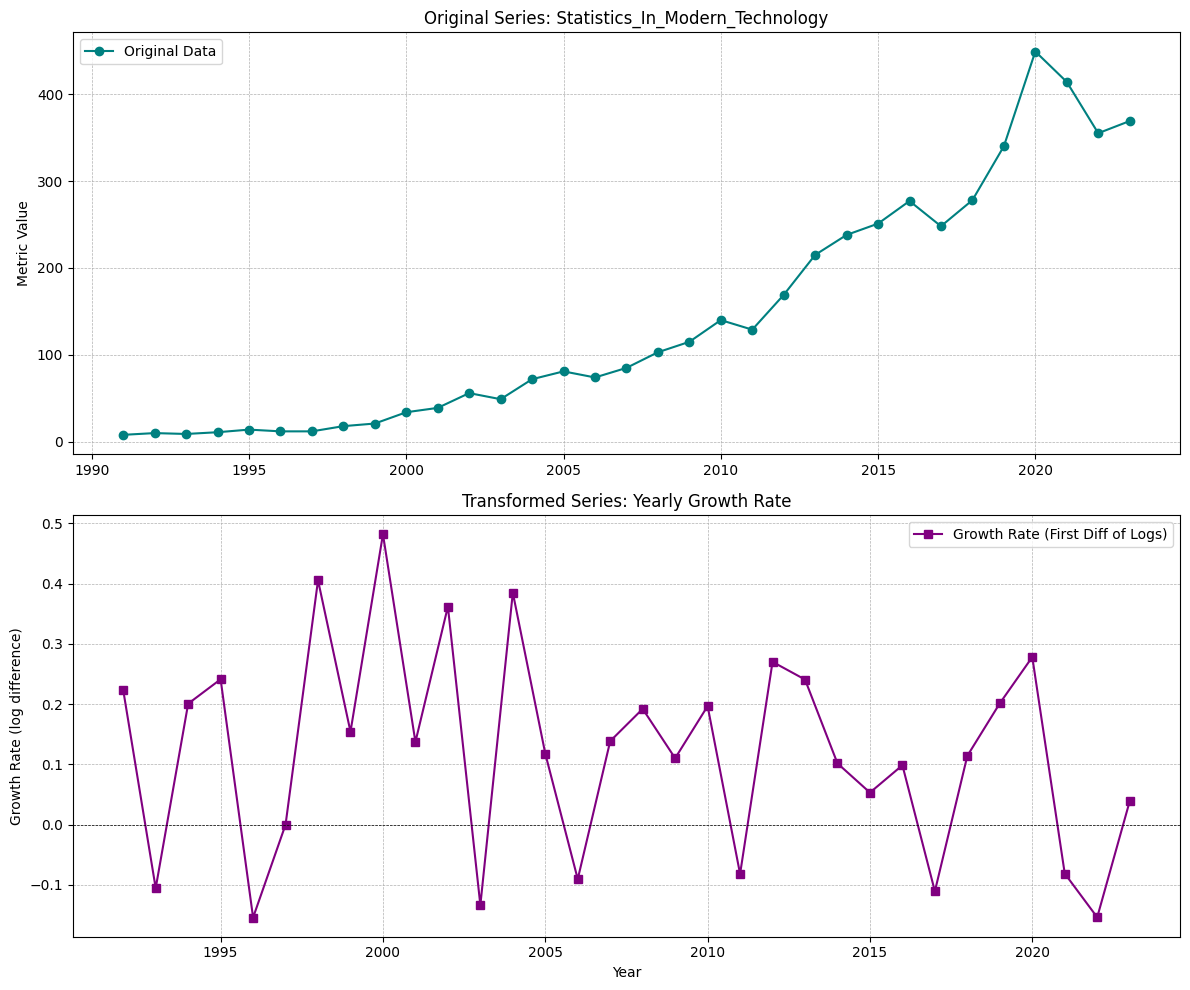


DataFrame with new transformed columns:
      Statistics_In_Modern_Technology  log_Stats_ModernTech  \
Year                                                          
1991                           8.0000                2.0794   
1992                          10.0000                2.3026   
1993                           9.0000                2.1972   
1994                          11.0000                2.3979   
1995                          14.0000                2.6391   
1996                          12.0000                2.4849   
1997                          12.0000                2.4849   
1998                          18.0000                2.8904   
1999                          21.0000                3.0445   
2000                          34.0000                3.5264   
2001                          39.0000                3.6636   
2002                          56.0000                4.0254   
2003                          49.0000                3.8918   
2004          

In [3]:
# 1. Applying the natural log transformation to the new target variable
df_historical['log_Stats_ModernTech'] = np.log(df_historical[target_column])

# 2. Creating the first-difference of the log-transformed series (the growth rate)
df_historical['log_diff_Stats_ModernTech'] = df_historical['log_Stats_ModernTech'].diff()

# 3. Plotting both the original and the transformed series to see the effect
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Original Series
ax1.plot(df_historical.index, df_historical[target_column], marker='o', color='teal', label='Original Data')
ax1.set_title(f'Original Series: {target_column}')
ax1.set_ylabel('Metric Value')
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.legend()
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

# Plot 2: Log-Transformed Series and its Difference
ax2.plot(df_historical.index, df_historical['log_diff_Stats_ModernTech'], marker='s', color='purple', 
         label='Growth Rate (First Diff of Logs)')
ax2.set_title('Transformed Series: Yearly Growth Rate')
ax2.set_xlabel('Year')
ax2.set_ylabel('Growth Rate (log difference)')
ax2.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.legend()
ax2.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

plt.tight_layout()
plt.show()

# 4. Inspecting the new columns in the DataFrame
print("\nDataFrame with new transformed columns:")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(df_historical[[target_column, 'log_Stats_ModernTech', 'log_diff_Stats_ModernTech']])

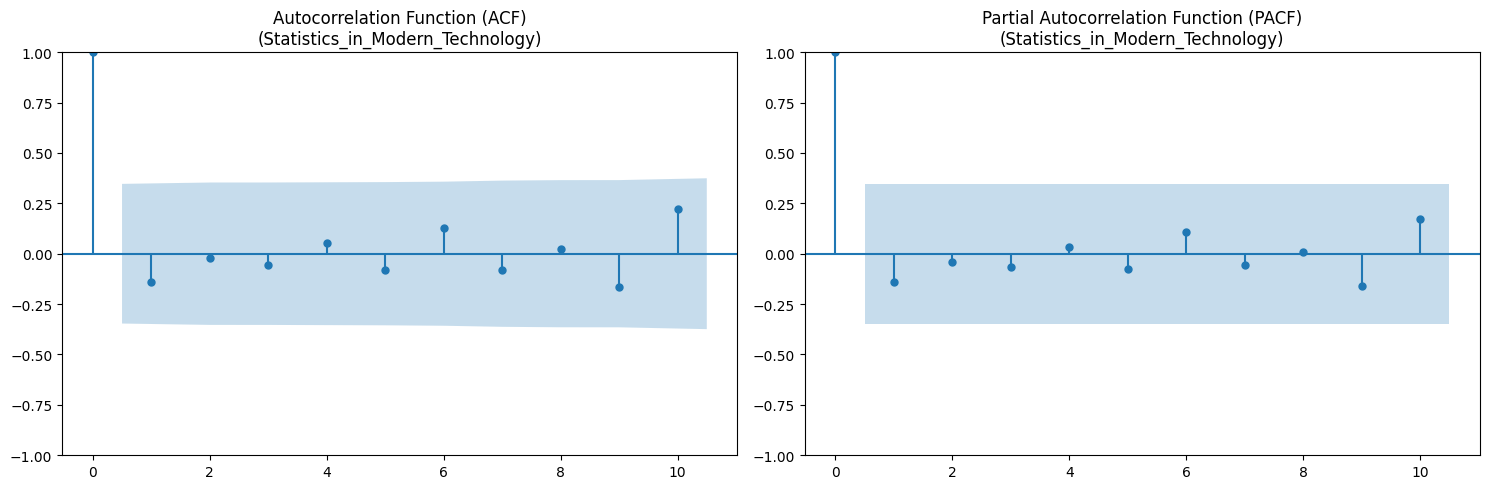


Final Engineered Feature DataFrame (First 5 Rows):
      log_diff_Stats_ModernTech   lag_1   lag_2   lag_3  years_since_start  \
Year                                                                         
1995                     0.2412  0.2007 -0.1054  0.2231                  3   
1996                    -0.1542  0.2412  0.2007 -0.1054                  4   
1997                     0.0000 -0.1542  0.2412  0.2007                  5   
1998                     0.4055  0.0000 -0.1542  0.2412                  6   
1999                     0.1542  0.4055  0.0000 -0.1542                  7   
2000                     0.4818  0.1542  0.4055  0.0000                  8   
2001                     0.1372  0.4818  0.1542  0.4055                  9   
2002                     0.3618  0.1372  0.4818  0.1542                 10   
2003                    -0.1335  0.3618  0.1372  0.4818                 11   
2004                     0.3848 -0.1335  0.3618  0.1372                 12   
2005        

In [4]:
# 1. Creating a working dataframe without the initial NaN value from .diff()
df_working = df_historical.dropna(subset=['log_diff_Stats_ModernTech']).copy()

# 2. Generating ACF/PACF plots to inform lag selection
stationary_series = df_working['log_diff_Stats_ModernTech']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(stationary_series, lags=10, ax=ax1, title='Autocorrelation Function (ACF)\n(Statistics_in_Modern_Technology)')
plot_pacf(stationary_series, lags=10, ax=ax2, title='Partial Autocorrelation Function (PACF)\n(Statistics_in_Modern_Technology)')
plt.tight_layout()
plt.show()

# 3. Creating Lagged Features based on the ACF/PACF insight
lags = 3  # We will start with 3 lags again, but let's see what the plots suggest
for lag in range(1, lags+1):
    lag_col_name = f'lag_{lag}'
    df_working[lag_col_name] = df_working['log_diff_Stats_ModernTech'].shift(lag)

# 4. Creating other features
df_working['years_since_start'] = df_working.index - df_working.index.min()
df_working['rolling_mean_3'] = df_working['log_diff_Stats_ModernTech'].rolling(window=3, min_periods=1).mean()
df_working['rolling_std_3'] = df_working['log_diff_Stats_ModernTech'].rolling(window=3, min_periods=1).std()

# 5. Removing rows with NaN values created while shifting and rolling
df_features = df_working.dropna().copy()

print("\nFinal Engineered Feature DataFrame (First 5 Rows):")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(df_features[['log_diff_Stats_ModernTech', 'lag_1', 'lag_2', 'lag_3', 'years_since_start', 
                       'rolling_mean_3', 'rolling_std_3']])

print(f"\nFinal DataFrame shape for modeling: {df_features.shape}")

In [5]:
# 1. Defining our Target (y) and Features (X) for the NEW series
y = df_features['log_diff_Stats_ModernTech'] # Target: Growth Rate
X = df_features[['lag_1', 'lag_2', 'lag_3', 'years_since_start', 'rolling_mean_3', 'rolling_std_3']] # Features

# 2. Performing a TEMPORAL Train-Test Split (using last 7 years for testing)
test_size = 7
X_train = X.iloc[:-test_size]
y_train = y.iloc[:-test_size]

X_test = X.iloc[-test_size:]
y_test = y.iloc[-test_size:]

# 3. Creating, training, and evaluating the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating performance metrics (MAE and MSE)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 4. Printing the results
print("Model Performance on Training Data (1995-2016):")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")

print("\n" + "="*50)
print("Model Performance on Unseen Test Data (2017-2023):")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")

# 5. Checking Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

Model Performance on Training Data (1995-2016):
Mean Absolute Error (MAE): 0.0534
Root Mean Squared Error (RMSE): 0.0689

Model Performance on Unseen Test Data (2017-2023):
Mean Absolute Error (MAE): 0.1372
Root Mean Squared Error (RMSE): 0.1554

Feature Importances:
rolling_mean_3       0.251468
lag_2                0.242513
rolling_std_3        0.221784
lag_3                0.122285
lag_1                0.089659
years_since_start    0.072291
dtype: float64


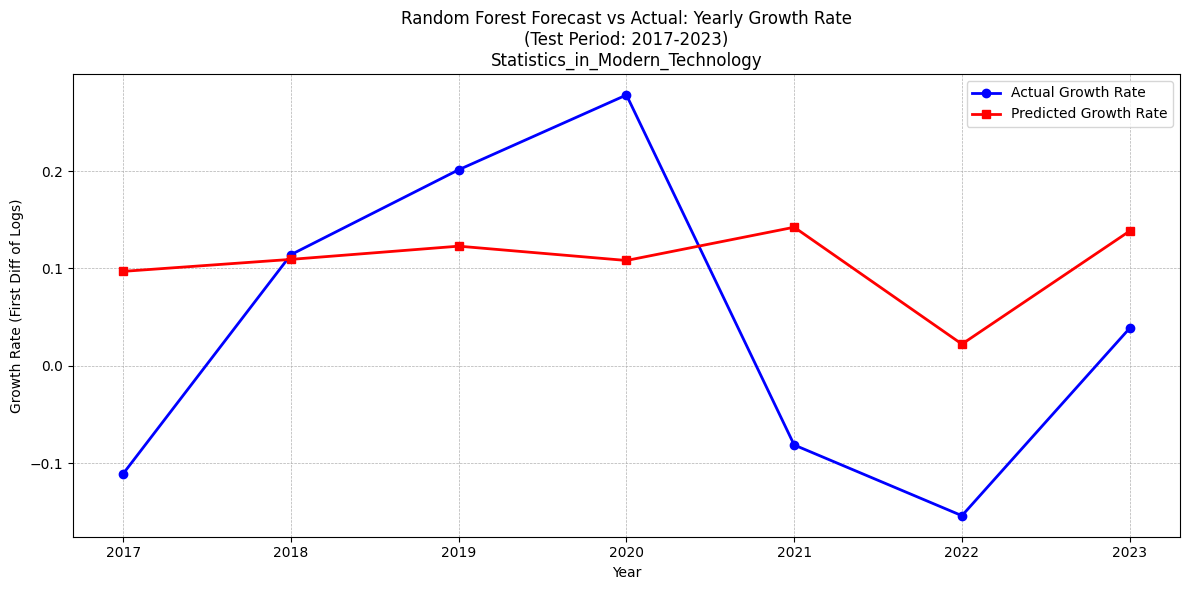

Forecast Performance on Test Period (2017-2023):
      Actual_Growth_Rate  Predicted_Growth_Rate
Year                                           
2017             -0.1106                 0.0970
2018              0.1142                 0.1093
2019              0.2013                 0.1229
2020              0.2781                 0.1082
2021             -0.0812                 0.1423
2022             -0.1537                 0.0224
2023              0.0387                 0.1384


In [6]:
# 1. Creating a DataFrame to compare actual vs predicted growth rates
results_test = pd.DataFrame({
    'Year': y_test.index,
    'Actual_Growth_Rate': y_test.values,
    'Predicted_Growth_Rate': y_test_pred
}).set_index('Year')

# 2. Plotting the comparison
plt.figure(figsize=(12, 6))
plt.plot(results_test.index, results_test['Actual_Growth_Rate'], marker='o', color='blue', 
         linewidth=2, label='Actual Growth Rate')
plt.plot(results_test.index, results_test['Predicted_Growth_Rate'], marker='s', color='red', 
         linewidth=2, label='Predicted Growth Rate')
plt.title('Random Forest Forecast vs Actual: Yearly Growth Rate\n(Test Period: 2017-2023)\nStatistics_in_Modern_Technology')
plt.xlabel('Year')
plt.ylabel('Growth Rate (First Diff of Logs)')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.tight_layout()
plt.show()

# 3. Printing the results
print("Forecast Performance on Test Period (2017-2023):")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(results_test)

Final Forecast with Realistic 95% Confidence Intervals (2023-2030):
Note: The wide confidence intervals reflect the high uncertainty identified in the model.
      Forecast  Upper_95CI  Lower_95CI
Year                                  
2023       369         369         369
2024       385         522         284
2025       421         572         311
2026       413         559         304
2027       449         609         331
2028       492         668         363
2029       530         719         391
2030       579         786         427


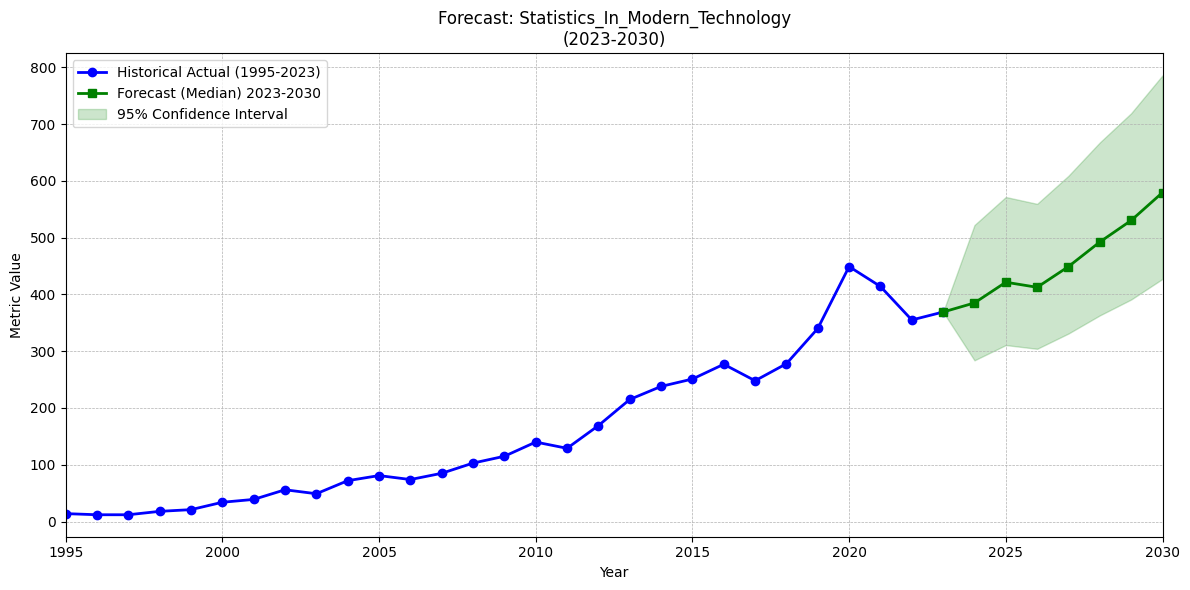

In [10]:
# 1. Retraining the final model on the entire dataset (1995-2023)
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y) # Using the full feature set we engineered

# 2. Preparing for recursive forecasting
last_known_index = df_features.index[-1] # This is 2023
forecast_horizon = 2030 - 2024 + 1 # Number of years to forecast (2024 to 2030 inclusive)

# Creating lists to store our future predictions
future_growth_predictions = []
# We will use a simple, large constant uncertainty based on our test RMSE
estimated_uncertainty = test_rmse # Using the RMSE from the test set as a measure of standard error

# Getting the last row of our feature set
last_row = X.iloc[-1:].copy()

# 3. Recursive forecasting loop
for year_ahead in range(1, forecast_horizon + 1):
    # Predict the growth rate for the next year.
    next_growth = final_model.predict(last_row)[0]
    future_growth_predictions.append(next_growth)
    
    # Updating the feature vector for the NEXT prediction
    last_row['lag_3'] = last_row['lag_2'].values
    last_row['lag_2'] = last_row['lag_1'].values
    last_row['lag_1'] = next_growth
    last_row['rolling_mean_3'] = (last_row['lag_1'] + last_row['lag_2'] + last_row['lag_3']) / 3
    last_row['rolling_std_3'] = np.std([last_row['lag_1'], last_row['lag_2'], last_row['lag_3']])
    last_row['years_since_start'] += 1

# 4. Integrating the forecasted growth rates
last_known_log_value = df_historical.loc[2023, 'log_Stats_ModernTech']
last_known_original_value = df_historical.loc[2023, target_column]

future_log_values = [last_known_log_value]
future_original_values = [last_known_original_value]
# Creating confidence intervals based on the test error
future_original_upper = [last_known_original_value]
future_original_lower = [last_known_original_value]

for growth_rate in future_growth_predictions:
    next_log_val = future_log_values[-1] + growth_rate
    future_log_values.append(next_log_val)
    
    next_original_val = np.exp(next_log_val)
    future_original_values.append(next_original_val)
    
    # Estimating a WIDE confidence interval using the test RMSE
    log_upper = next_log_val + (1.96 * estimated_uncertainty) # ~95% CI
    log_lower = next_log_val - (1.96 * estimated_uncertainty) # ~95% CI
    future_original_upper.append(np.exp(log_upper))
    future_original_lower.append(np.exp(log_lower))

# 5. Creating the final forecast DataFrame (2023-2030 only)
forecast_years = pd.RangeIndex(start=2023, stop=2031, step=1)  # Changed to 2031 to include 2030
final_forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Forecast': future_original_values,
    'Upper_95CI': future_original_upper,
    'Lower_95CI': future_original_lower
}).set_index('Year')

# Displaying the forecast for 2023-2030 only
print("Final Forecast with Realistic 95% Confidence Intervals (2023-2030):")
print("Note: The wide confidence intervals reflect the high uncertainty identified in the model.")
with pd.option_context('display.float_format', '{:,.0f}'.format):
    print(final_forecast_df)

# 6. Plotting the historical data and the forecast with uncertainty (focus on 2023-2030)
plt.figure(figsize=(12, 6))

# Plot recent historical data (last 10 years for context) and forecast
start_year = max(1995, df_historical.index.min())  # Show last 10 years of historical data
historical_recent = df_historical[df_historical.index >= start_year]

plt.plot(historical_recent.index, historical_recent[target_column], marker='o', color='blue', linewidth=2, 
         label=f'Historical Actual ({start_year}-2023)')
# Plotting the forecast
plt.plot(final_forecast_df.index, final_forecast_df['Forecast'], marker='s', color='green', 
         linewidth=2, label='Forecast (Median) 2023-2030')
# Plotting the confidence interval
plt.fill_between(final_forecast_df.index, final_forecast_df['Lower_95CI'], final_forecast_df['Upper_95CI'],
                 color='green', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Forecast: {target_column}\n(2023-2030)')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

# Set x-axis limits to focus on 2023-2030 with some context
plt.xlim(start_year, 2030)

plt.tight_layout()
plt.show()